In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles


In [2]:
dbFile = 'minion_1016_sqlite.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixSlicer(latLonDeg=False, useCamera=True, mjdColName='expMJD')
sql = 'night < 50 and filter="r"'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database Summary with constraint night < 50 and filter="r" for columns ['fieldRA', 'rotSkyPos', 'expMJD', 'fieldDec']
Found 2077 visits
Running:  ['opsim_Count_expMJD_night_lt_50_and_r_HEAL']


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 50 and filter="r"" constraint now.
monopole: 10.3521  dipole: lon: -37.8957, lat: 35.5299, amp: 5.14489
Plotting complete.


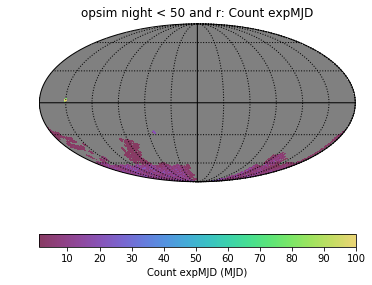

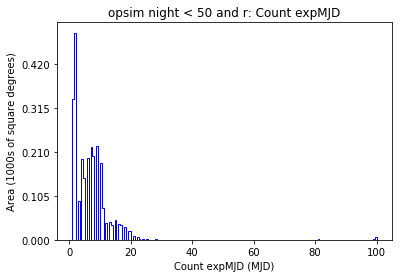

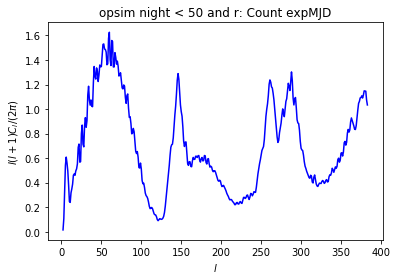

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [5]:
bundleList = []

metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixComCamSlicer(latLonDeg=False, useCamera=True, mjdColName='expMJD')
sql = 'night < 50 and filter="r"'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database Summary with constraint night < 50 and filter="r" for columns ['fieldRA', 'rotSkyPos', 'expMJD', 'fieldDec']
Found 2077 visits
Running:  ['opsim_Count_expMJD_night_lt_50_and_r_HEAL']


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 50 and filter="r"" constraint now.
monopole: 17.9622  dipole: lon: -39.6565, lat: 66.9672, amp: 14.9764
Plotting complete.


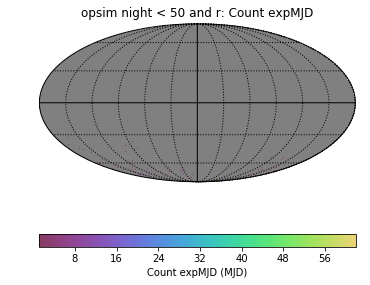

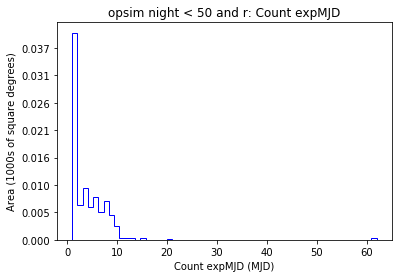

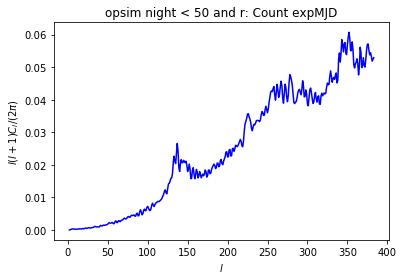

In [6]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)